In [1]:
!nvidia-smi -L

GPU 0: Tesla V100-SXM2-16GB (UUID: GPU-598f809e-cfa5-5ab7-7eb9-3c84060a4082)


In [2]:
from google.colab import drive
import zipfile

In [3]:
drive.mount("/content/drive", force_remount=True)

zip=zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/food 101.zip')
zip.extractall()
zip.close()

Mounted at /content/drive


In [4]:
! pip install split-folders

In [5]:
import splitfolders

splitfolders.ratio("/content/food 101", output="output", seed=365, ratio=(0.8,0.1,0.1))

Copying files: 101000 files [01:49, 926.53 files/s]


In [6]:
import os

In [ ]:
for dirpaths, dirnames, filenames in os.walk ("/content/output/train"):
  print (f"there are {len(filenames)} images and {len(dirnames)} directories in {dirpaths}")

there are 0 images and 101 directories in /content/output/train
there are 800 images and 0 directories in /content/output/train/nachos
there are 800 images and 0 directories in /content/output/train/takoyaki
there are 800 images and 0 directories in /content/output/train/falafel
there are 800 images and 0 directories in /content/output/train/seaweed_salad
there are 800 images and 0 directories in /content/output/train/churros
there are 800 images and 0 directories in /content/output/train/foie_gras
there are 800 images and 0 directories in /content/output/train/eggs_benedict
there are 800 images and 0 directories in /content/output/train/baby_back_ribs
there are 800 images and 0 directories in /content/output/train/deviled_eggs
there are 800 images and 0 directories in /content/output/train/oysters
there are 800 images and 0 directories in /content/output/train/french_toast
there are 800 images and 0 directories in /content/output/train/tuna_tartare
there are 800 images and 0 directori

In [ ]:
for dirpaths, dirnames, filenames in os.walk ("/content/output/val"):
  print (f"there are {len(filenames)} images and {len(dirnames)} directories in {dirpaths}")

there are 0 images and 101 directories in /content/output/val
there are 100 images and 0 directories in /content/output/val/nachos
there are 100 images and 0 directories in /content/output/val/takoyaki
there are 100 images and 0 directories in /content/output/val/falafel
there are 100 images and 0 directories in /content/output/val/seaweed_salad
there are 100 images and 0 directories in /content/output/val/churros
there are 100 images and 0 directories in /content/output/val/foie_gras
there are 100 images and 0 directories in /content/output/val/eggs_benedict
there are 100 images and 0 directories in /content/output/val/baby_back_ribs
there are 100 images and 0 directories in /content/output/val/deviled_eggs
there are 100 images and 0 directories in /content/output/val/oysters
there are 100 images and 0 directories in /content/output/val/french_toast
there are 100 images and 0 directories in /content/output/val/tuna_tartare
there are 100 images and 0 directories in /content/output/val/

In [ ]:
for dirpaths, dirnames, filenames in os.walk ("/content/output/test"):
  print (f"there are {len(filenames)} images and {len(dirnames)} directories in {dirpaths}")

there are 0 images and 101 directories in /content/output/test
there are 100 images and 0 directories in /content/output/test/nachos
there are 100 images and 0 directories in /content/output/test/takoyaki
there are 100 images and 0 directories in /content/output/test/falafel
there are 100 images and 0 directories in /content/output/test/seaweed_salad
there are 100 images and 0 directories in /content/output/test/churros
there are 100 images and 0 directories in /content/output/test/foie_gras
there are 100 images and 0 directories in /content/output/test/eggs_benedict
there are 100 images and 0 directories in /content/output/test/baby_back_ribs
there are 100 images and 0 directories in /content/output/test/deviled_eggs
there are 100 images and 0 directories in /content/output/test/oysters
there are 100 images and 0 directories in /content/output/test/french_toast
there are 100 images and 0 directories in /content/output/test/tuna_tartare
there are 100 images and 0 directories in /conten

In [7]:
import tensorflow as tf

In [8]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16")

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla V100-SXM2-16GB, compute capability 7.0


In [25]:
train_dir="/content/output/train"
val_dir="/content/output/val"
test_dir="/content/output/test"

train_set=tf.keras.preprocessing.image_dataset_from_directory(train_dir,image_size=(300,300),label_mode="categorical", batch_size=32)
val_set=tf.keras.preprocessing.image_dataset_from_directory(val_dir,image_size=(300,300),label_mode="categorical", batch_size=32, shuffle=False)
test_set=tf.keras.preprocessing.image_dataset_from_directory(test_dir,image_size=(300,300),label_mode="categorical", batch_size=32, shuffle=False)

Found 80800 files belonging to 101 classes.
Found 10100 files belonging to 101 classes.
Found 10100 files belonging to 101 classes.


In [10]:
train_set=train_set.prefetch(buffer_size=tf.data.AUTOTUNE)
val_set=val_set.prefetch(buffer_size=tf.data.AUTOTUNE)
test_set=test_set.prefetch(buffer_size=tf.data.AUTOTUNE)

In [11]:
data_augmentation=tf.keras.Sequential([
                                       tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
                                       tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
                                       tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
                                       tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
                                       tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
                                       ])

In [ ]:
base_model=tf.keras.applications.EfficientNetB3(include_top=False)

base_model.trainable=False

43941888/43941136 [==============================] - 1s 0us/step


In [ ]:
tf.random.set_seed(365)

input_shape=(300,300,3)
output_size=101

inputs=tf.keras.layers.Input(shape=input_shape)

x=data_augmentation(inputs)
x=base_model(x)
x=tf.keras.layers.GlobalAveragePooling2D()(x)
x=tf.keras.layers.Flatten()(x)
outputs=tf.keras.layers.Dense(output_size,activation="softmax",dtype=tf.float32)(x)

model=tf.keras.Model(inputs,outputs)

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

early_stopping=tf.keras.callbacks.EarlyStopping(patience=3)
history01=model.fit(train_set, epochs=20, steps_per_epoch=len(train_set),validation_data=val_set,validation_steps=len(val_set),
          callbacks=[early_stopping],verbose=2)


Epoch 1/20
2525/2525 - 438s - loss: 2.0108 - accuracy: 0.5095 - val_loss: 1.4103 - val_accuracy: 0.6286
Epoch 2/20
2525/2525 - 391s - loss: 1.5720 - accuracy: 0.5984 - val_loss: 1.3375 - val_accuracy: 0.6505
Epoch 3/20
2525/2525 - 351s - loss: 1.4612 - accuracy: 0.6221 - val_loss: 1.2742 - val_accuracy: 0.6652
Epoch 4/20
2525/2525 - 317s - loss: 1.4005 - accuracy: 0.6361 - val_loss: 1.2590 - val_accuracy: 0.6702
Epoch 5/20
2525/2525 - 313s - loss: 1.3622 - accuracy: 0.6441 - val_loss: 1.2542 - val_accuracy: 0.6729
Epoch 6/20
2525/2525 - 310s - loss: 1.3232 - accuracy: 0.6530 - val_loss: 1.2558 - val_accuracy: 0.6716
Epoch 7/20
2525/2525 - 307s - loss: 1.2989 - accuracy: 0.6589 - val_loss: 1.2443 - val_accuracy: 0.6752
Epoch 8/20
2525/2525 - 306s - loss: 1.2722 - accuracy: 0.6637 - val_loss: 1.2444 - val_accuracy: 0.6747
Epoch 9/20
2525/2525 - 306s - loss: 1.2553 - accuracy: 0.6677 - val_loss: 1.2358 - val_accuracy: 0.6783
Epoch 10/20
2525/2525 - 305s - loss: 1.2381 - accuracy: 0.6708 -

In [ ]:
model.save("Model: Feature Extraction")

INFO:tensorflow:Assets written to: Model: Feature Extraction/assets


In [ ]:
model=tf.keras.models.load_model("/content/drive/MyDrive/Model: Feature Extraction")

In [13]:
tf.random.set_seed(365)

for layer in model.layers:
  layer.trainable=True


model.compile(tf.keras.optimizers.Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])

early_stopping=tf.keras.callbacks.EarlyStopping(patience=5)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.2, 
                                                 patience=2,
                                                 verbose=1, 
                                                 min_lr=1e-7)

history02=model.fit(train_set, epochs=500, steps_per_epoch=len(train_set),validation_data=val_set,validation_steps=len(val_set),
                    callbacks=[early_stopping, reduce_lr], verbose=2)

Epoch 1/500
2525/2525 - 1016s - loss: 1.2113 - accuracy: 0.6831 - val_loss: 0.9800 - val_accuracy: 0.7382
Epoch 2/500
2525/2525 - 718s - loss: 0.7660 - accuracy: 0.7889 - val_loss: 0.8622 - val_accuracy: 0.7669
Epoch 3/500
2525/2525 - 634s - loss: 0.6047 - accuracy: 0.8292 - val_loss: 0.8597 - val_accuracy: 0.7762
Epoch 4/500
2525/2525 - 591s - loss: 0.4962 - accuracy: 0.8574 - val_loss: 0.8200 - val_accuracy: 0.7907
Epoch 5/500
2525/2525 - 577s - loss: 0.4029 - accuracy: 0.8813 - val_loss: 0.8461 - val_accuracy: 0.7900
Epoch 6/500
2525/2525 - 563s - loss: 0.3380 - accuracy: 0.8984 - val_loss: 0.8528 - val_accuracy: 0.7935

Epoch 00006: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
Epoch 7/500
2525/2525 - 559s - loss: 0.2211 - accuracy: 0.9340 - val_loss: 0.7894 - val_accuracy: 0.8072
Epoch 8/500
2525/2525 - 552s - loss: 0.1862 - accuracy: 0.9450 - val_loss: 0.7912 - val_accuracy: 0.8070
Epoch 9/500
2525/2525 - 554s - loss: 0.1635 - accuracy: 0.9525 - val_loss: 0.

In [14]:
model.save("Model: Fine Tuning")

INFO:tensorflow:Assets written to: Model: Fine Tuning/assets


INFO:tensorflow:Assets written to: Model: Fine Tuning/assets


In [15]:
model.evaluate(test_set)

316/316 [==============================] - 42s 132ms/step - loss: 0.8011 - accuracy: 0.8129


[0.8010501265525818, 0.8128712773323059]

In [16]:
pred_prob=model.predict(test_set)

In [17]:
pred_prob.shape

(10100, 101)

In [18]:
pred_class=pred_prob.argmax(axis=1)

pred_class.shape

(10100,)

In [19]:
test_class=[]

for image, label in test_set.unbatch():
  test_class.append(label.numpy().argmax())

In [20]:
len(test_class)

10100

In [26]:
class_name=test_set.class_names

class_name

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix=confusion_matrix(test_class,pred_class)

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [30]:
cm_df=pd.DataFrame(confusion_matrix, index=[i for i in class_name],
                   columns=[i for i in class_name])

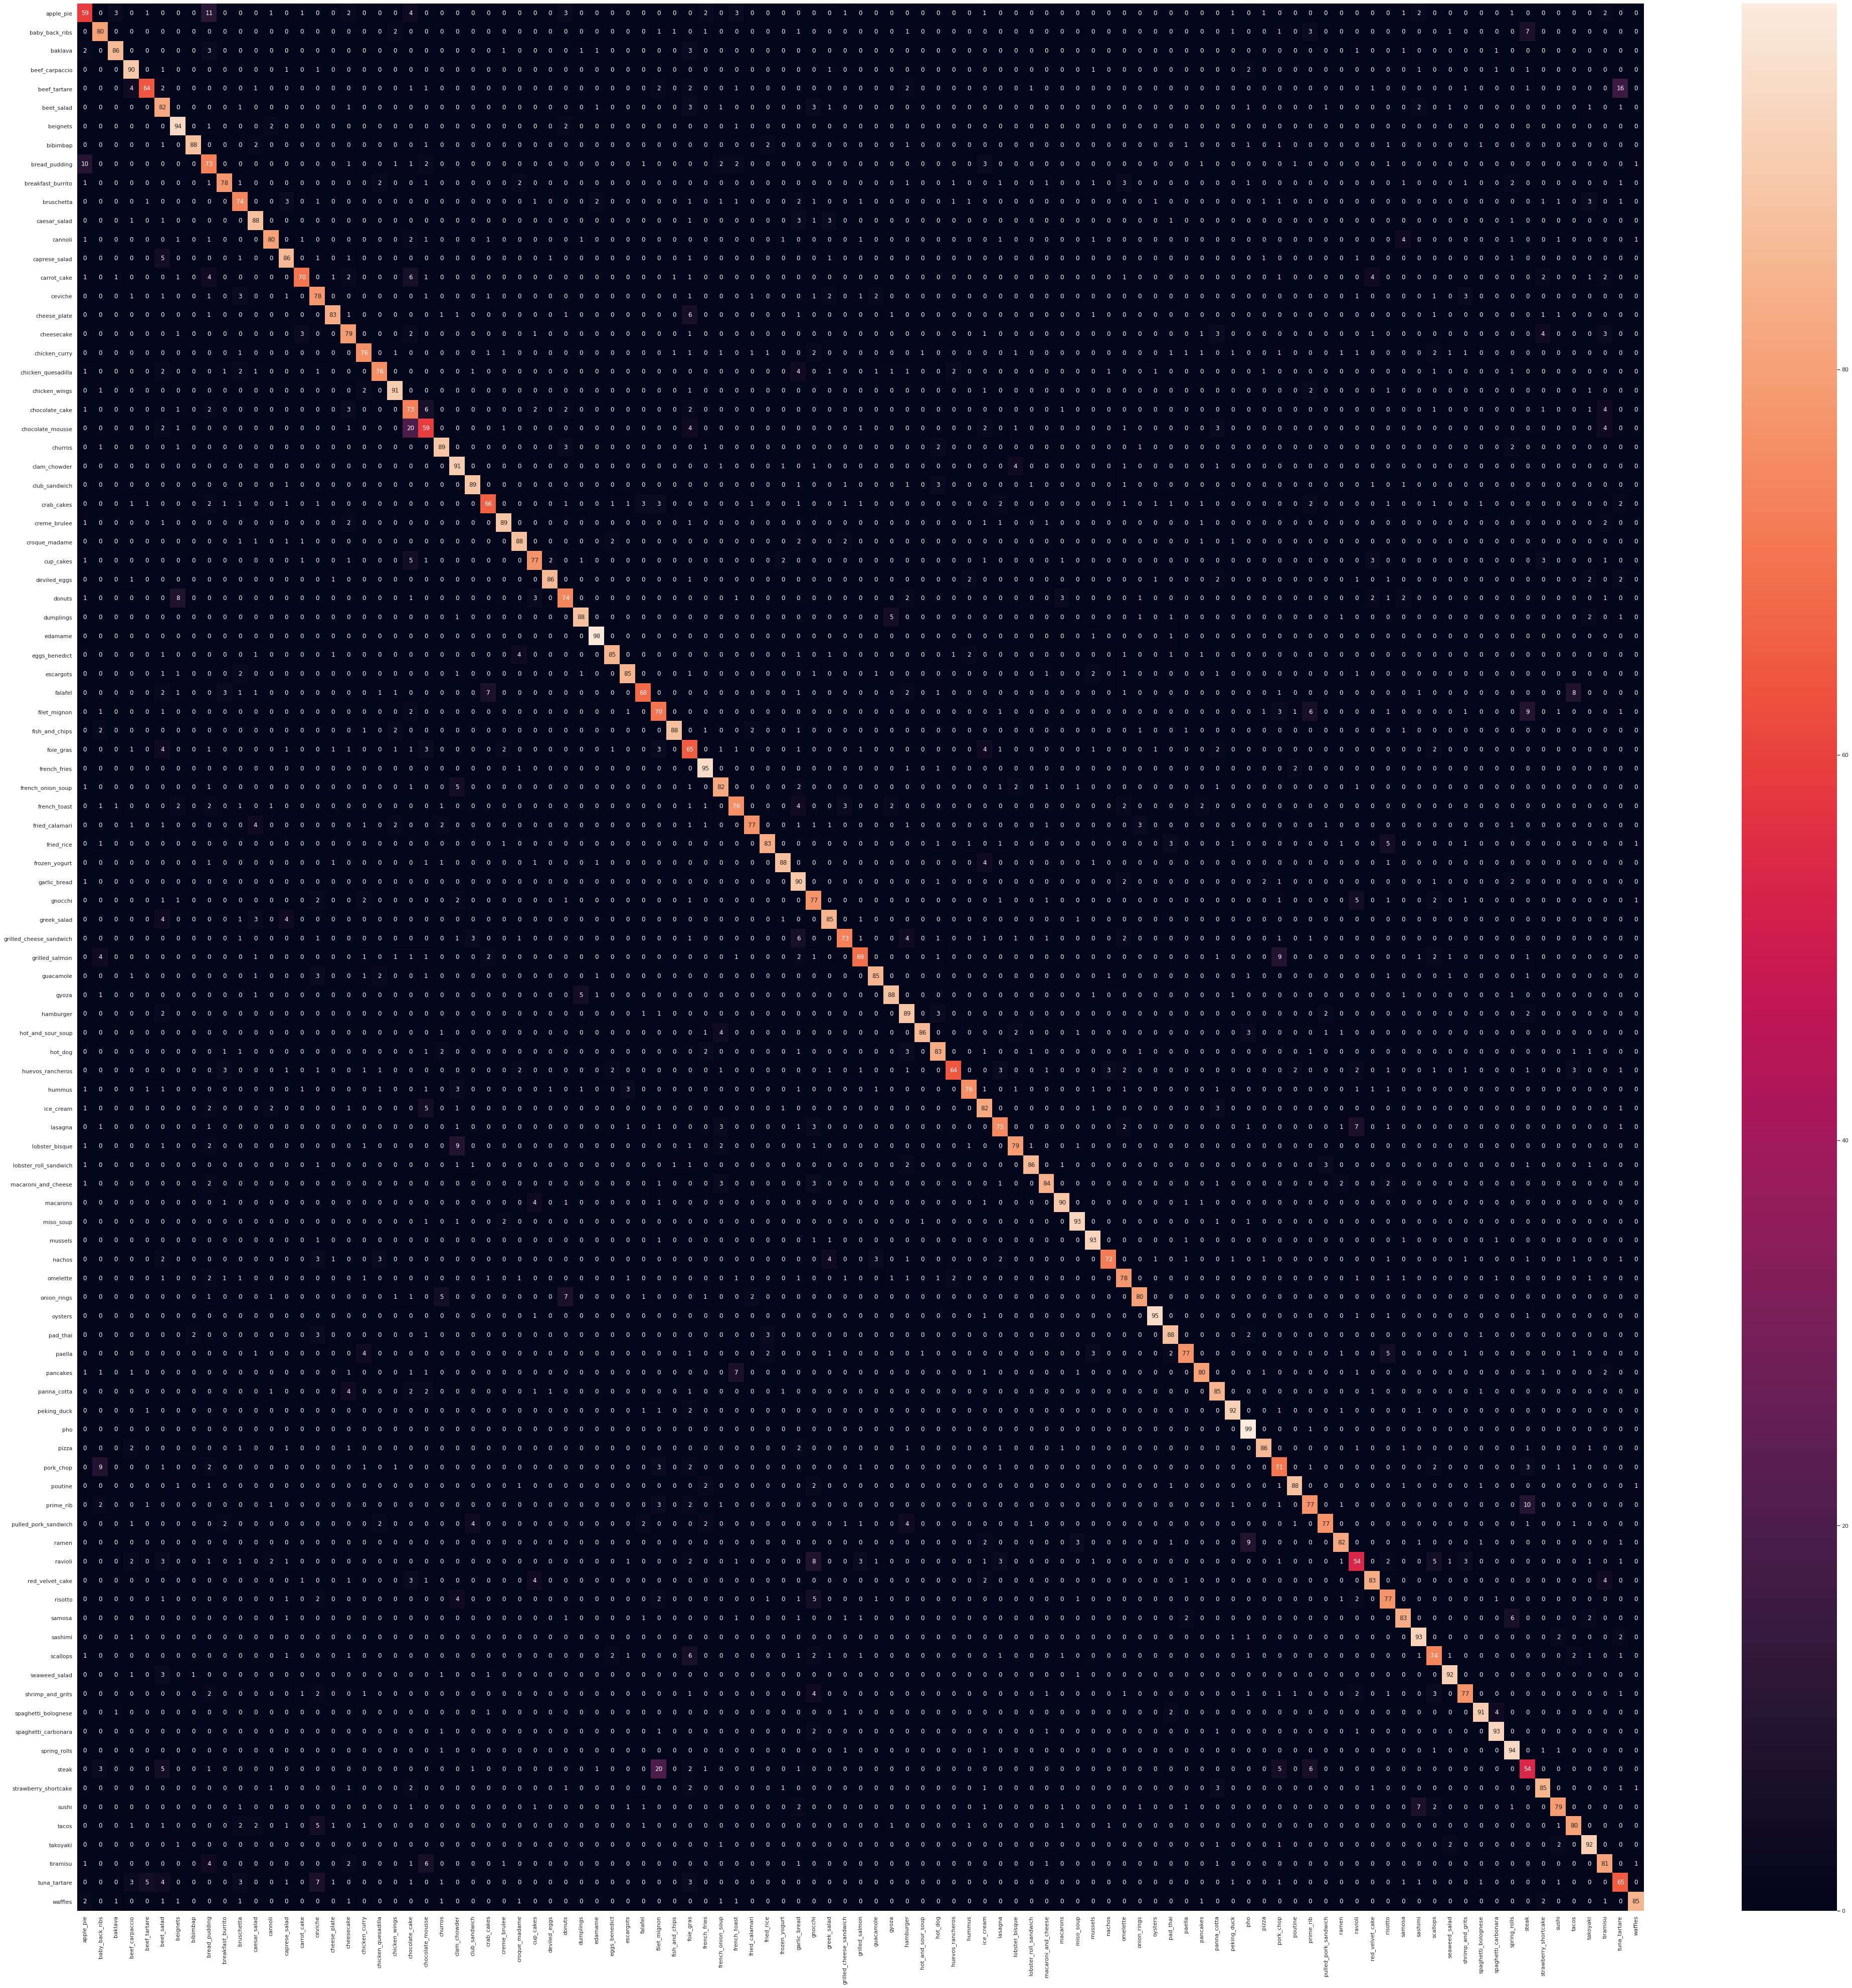

In [31]:
plt.figure(figsize=(70,70))
sns.heatmap(cm_df,annot=True)

In [32]:
from sklearn.metrics import classification_report

In [33]:
report=classification_report(test_class,pred_class,output_dict=True)
report

{'0': {'f1-score': 0.6178010471204188,
  'precision': 0.6483516483516484,
  'recall': 0.59,
  'support': 100},
 '1': {'f1-score': 0.7692307692307692,
  'precision': 0.7407407407407407,
  'recall': 0.8,
  'support': 100},
 '10': {'f1-score': 0.7326732673267328,
  'precision': 0.7254901960784313,
  'recall': 0.74,
  'support': 100},
 '100': {'f1-score': 0.8854166666666666,
  'precision': 0.9239130434782609,
  'recall': 0.85,
  'support': 100},
 '11': {'f1-score': 0.8461538461538461,
  'precision': 0.8148148148148148,
  'recall': 0.88,
  'support': 100},
 '12': {'f1-score': 0.8333333333333333,
  'precision': 0.8695652173913043,
  'recall': 0.8,
  'support': 100},
 '13': {'f1-score': 0.8309178743961353,
  'precision': 0.8037383177570093,
  'recall': 0.86,
  'support': 100},
 '14': {'f1-score': 0.7777777777777777,
  'precision': 0.875,
  'recall': 0.7,
  'support': 100},
 '15': {'f1-score': 0.7289719626168225,
  'precision': 0.6842105263157895,
  'recall': 0.78,
  'support': 100},
 '16': {'

In [34]:
f1_score={}

for a,b in report.items():
  if a == "accuracy":
    break
  else:
    f1_score[class_name[int(a)]]=b['f1-score']

f1_score

{'apple_pie': 0.6178010471204188,
 'baby_back_ribs': 0.7692307692307692,
 'baklava': 0.8911917098445595,
 'beef_carpaccio': 0.8450704225352113,
 'beef_tartare': 0.7314285714285714,
 'beet_salad': 0.6861924686192469,
 'beignets': 0.8703703703703703,
 'bibimbap': 0.9214659685863875,
 'bread_pudding': 0.6460176991150441,
 'breakfast_burrito': 0.8167539267015708,
 'bruschetta': 0.7326732673267328,
 'caesar_salad': 0.8461538461538461,
 'cannoli': 0.8333333333333333,
 'caprese_salad': 0.8309178743961353,
 'carrot_cake': 0.7777777777777777,
 'ceviche': 0.7289719626168225,
 'cheese_plate': 0.869109947643979,
 'cheesecake': 0.7596153846153846,
 'chicken_curry': 0.7835051546391754,
 'chicken_quesadilla': 0.8085106382978724,
 'chicken_wings': 0.892156862745098,
 'chocolate_cake': 0.6293103448275862,
 'chocolate_mousse': 0.5929648241206029,
 'churros': 0.8599033816425121,
 'clam_chowder': 0.8198198198198198,
 'club_sandwich': 0.8944723618090452,
 'crab_cakes': 0.7292817679558011,
 'creme_brulee': 

In [35]:
f1_report=pd.DataFrame({"class name":list(f1_score.keys()),
                        "f1 score":list(f1_score.values())}).sort_values("f1 score",ascending=False)

f1_report

,class name,f1 score
33,edamame,0.951456
69,oysters,0.945274
7,bibimbap,0.921466
91,spaghetti_carbonara,0.920792
90,spaghetti_bolognese,0.919192
...,...,...
0,apple_pie,0.617801
22,chocolate_mousse,0.592965
82,ravioli,0.583784
39,foie_gras,0.572687


In [38]:
f1_report[-20:]

,class name,f1 score
56,huevos_rancheros,0.748538
50,grilled_salmon,0.745946
84,risotto,0.740385
87,scallops,0.732673
10,bruschetta,0.732673
4,beef_tartare,0.731429
26,crab_cakes,0.729282
15,ceviche,0.728972
47,gnocchi,0.700000
77,pork_chop,0.696078


In [39]:
f1_report[:20]

,class name,f1 score
33,edamame,0.951456
69,oysters,0.945274
7,bibimbap,0.921466
91,spaghetti_carbonara,0.920792
90,spaghetti_bolognese,0.919192
38,fish_and_chips,0.916667
64,miso_soup,0.916256
88,seaweed_salad,0.915423
74,peking_duck,0.910891
54,hot_and_sour_soup,0.910053
